# Frequency integrated spherical tensors

In [1]:
!pwd

/Users/kulkarniad/rh_aniso/rhsc3d/small


In [2]:
# I ran rh using commit 2c7abc7cd6910925

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [4]:
sr_lambda  = np.loadtxt('wl.csv')
sim_z = np.loadtxt('z.csv')

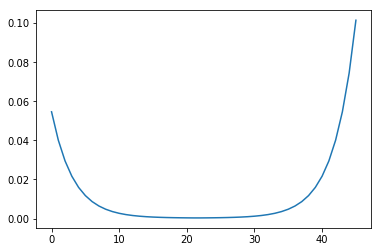

In [5]:
plt.plot(np.diff(sr_lambda[11:58]))

## Data for small cross section of MURaM cube (zooming in on a granule)

In [6]:
J00 = np.loadtxt('J.txt').reshape(64,50,50)
J20 = np.loadtxt('J20.txt').reshape(64,50,50)
reJ21 = np.loadtxt('reJ21.txt').reshape(64,50,50)
imJ21 = np.loadtxt('imJ21.txt').reshape(64,50,50)
reJ22 = np.loadtxt('reJ22.txt').reshape(64,50,50)
imJ22 = np.loadtxt('imJ22.txt').reshape(64,50,50)

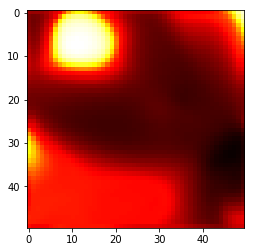

In [7]:
plt.imshow(J00[26,:,:],cmap='hot')

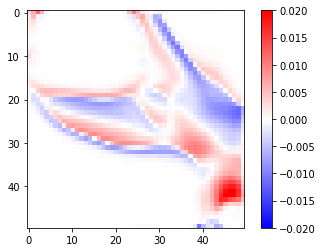

In [8]:
plt.imshow(imJ21[30,:,:]/J00[30,:,:],cmap='bwr')
plt.clim(-0.02,0.02)
plt.colorbar()

## Zero out perpendicular velcoties in MURaM cube and see how the components of spherical tensors change

In [9]:
v0_J00 = np.loadtxt('../vperp_0_small/J.txt').reshape(64,50,50)
v0_J20 = np.loadtxt('../vperp_0_small/J20.txt').reshape(64,50,50)
v0_reJ21 = np.loadtxt('../vperp_0_small/reJ21.txt').reshape(64,50,50)
v0_imJ21 = np.loadtxt('../vperp_0_small/imJ21.txt').reshape(64,50,50)
v0_reJ22 = np.loadtxt('../vperp_0_small/reJ22.txt').reshape(64,50,50)
v0_imJ22 = np.loadtxt('../vperp_0_small/imJ22.txt').reshape(64,50,50)

percent difference = 0.01538


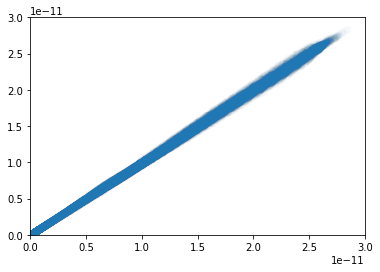

In [10]:
plt.scatter(v0_J00.flatten(),J00.flatten(),alpha=0.01)
plt.xlim(0,3e-11)
plt.ylim(0,3e-11)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))
plt.show()

rms difference ~ 0.0301


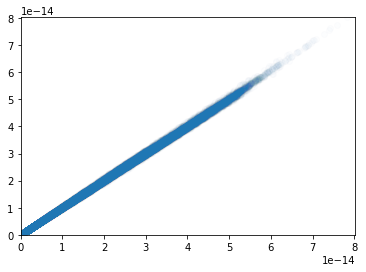

In [11]:
plt.scatter(v0_J20.flatten(),J20.flatten(),alpha=0.01)
up = np.max(J20)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std(v0_J20 - J20)/np.mean(J20)
print('rms difference ~ '+ str(round(rms,5)))

plt.show()

percent difference = 0.01538


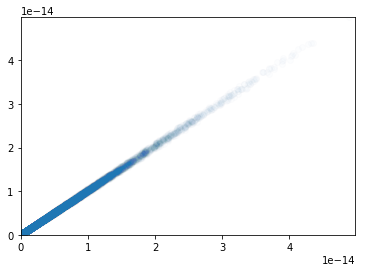

In [12]:
plt.scatter(v0_reJ21.flatten(),reJ21.flatten(),alpha=0.01)
up = np.max(reJ21)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

percent difference = 0.01538


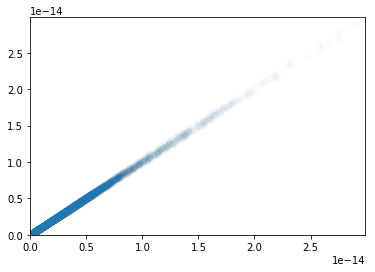

In [13]:
plt.scatter(v0_reJ22.flatten(),reJ22.flatten(),alpha=0.01)
up = np.max(reJ22)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

percent difference = 0.01538


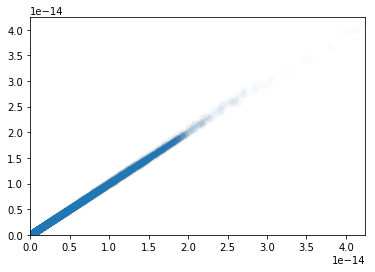

In [14]:
plt.scatter(v0_imJ21.flatten(),imJ21.flatten(),alpha=0.01)
up = np.max(imJ21)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

percent difference = 0.01538


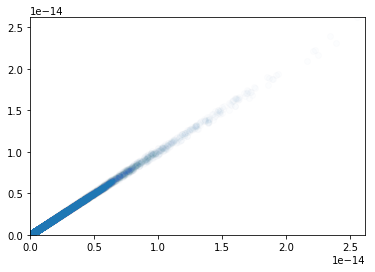

In [15]:
plt.scatter(v0_imJ22.flatten(),imJ22.flatten(),alpha=0.01)
up = np.max(imJ22)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

In [16]:
np.sqrt(np.std((v0_imJ21.flatten() - imJ21.flatten())**2))

1.7005017934237677e-16

# A zoom in

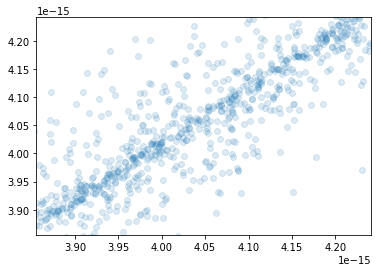

In [17]:
plt.scatter(v0_imJ21.flatten(),imJ21.flatten(),alpha=0.15)
up = np.max(imJ21)
plt.xlim(up/11,up/10)
plt.ylim(up/11,up/10)
plt.show()

# Judging the the scatter plots, zeroing the verpendicular produces essentially no change in the resulting spherical tensors

In [18]:
# function to read in RH atmosspheres read through read3datmos.pro and
# written to a fits file using mwrfits.pro
class atmos:
    def __init__(self,fname):
        
        data = fits.open(fname)
        a = data[1].data[0]
        
        self.nx = a[0]
        self.ny = a[1]
        self.nz = a[2]
        self.nhydr = a[3]
        self.bcs = a[4]
        self.dx = a[5]
        self.dy = a[6]
        self.z = a[7]
        self.t = a[8]
        self.nelec = a[9]
        self.vturb = a[10]
        self.vx = a[11]
        self.vy = a[12]
        self.vz = a[13]
        self.nh = a[14]

In [19]:
s = atmos('/Users/kulkarniad/muram/small.fits')
v0s = atmos('/Users/kulkarniad/muram/vperp_0_small.fits')



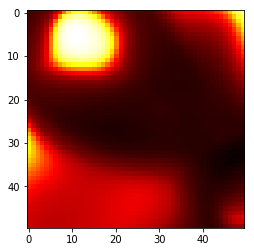

In [20]:
plt.imshow(s.t[26,:,:],cmap='hot')

# Now compre to see how the spherical tensors compare with the true simulation vs the reconstructed atmosphere

In [21]:
r_J00 = np.loadtxt('../reconstruct/J.txt').reshape(64,50,50)
r_J20 = np.loadtxt('../reconstruct/J20.txt').reshape(64,50,50)
r_reJ21 = np.loadtxt('../reconstruct/reJ21.txt').reshape(64,50,50)
r_imJ21 = np.loadtxt('../reconstruct/imJ21.txt').reshape(64,50,50)
r_reJ22 = np.loadtxt('../reconstruct/reJ22.txt').reshape(64,50,50)
r_imJ22 = np.loadtxt('../reconstruct/imJ22.txt').reshape(64,50,50)

smooth_J00 = np.loadtxt('../smooth_reconstruct/J.txt').reshape(64,50,50)
smooth_J20 = np.loadtxt('../smooth_reconstruct/J20.txt').reshape(64,50,50)
smooth_reJ21 = np.loadtxt('../smooth_reconstruct/reJ21.txt').reshape(64,50,50)
smooth_imJ21 = np.loadtxt('../smooth_reconstruct/imJ21.txt').reshape(64,50,50)
smooth_reJ22 = np.loadtxt('../smooth_reconstruct/reJ22.txt').reshape(64,50,50)
smooth_imJ22 = np.loadtxt('../smooth_reconstruct/imJ22.txt').reshape(64,50,50)

slice at 88.86km


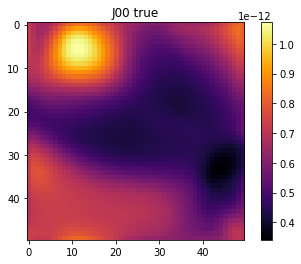

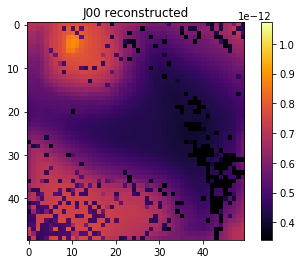

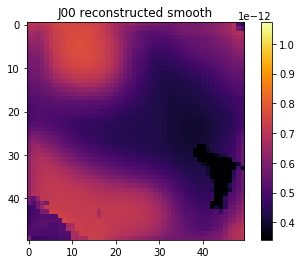

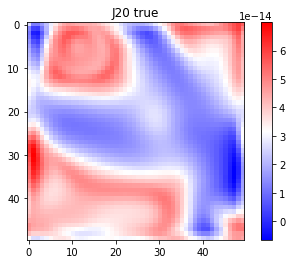

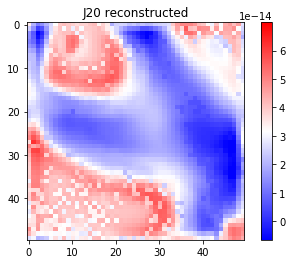

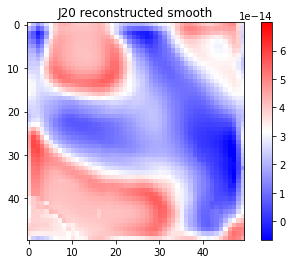

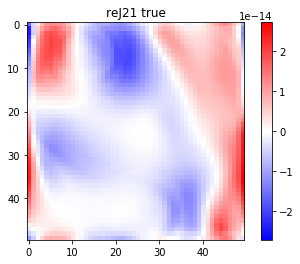

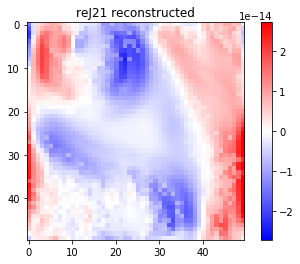

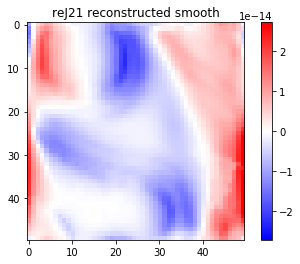

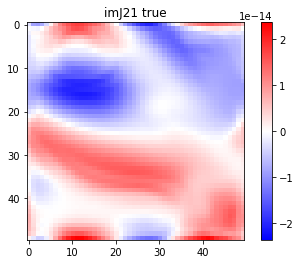

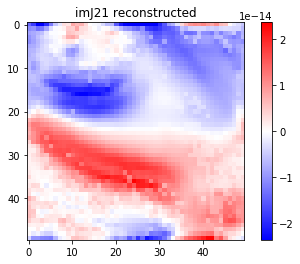

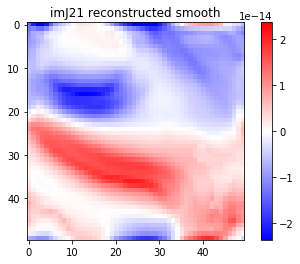

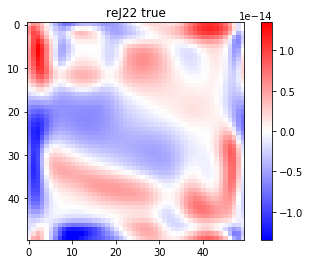

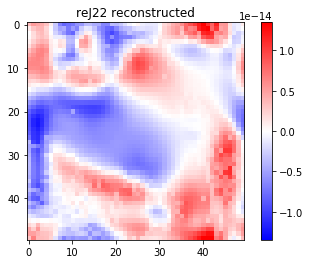

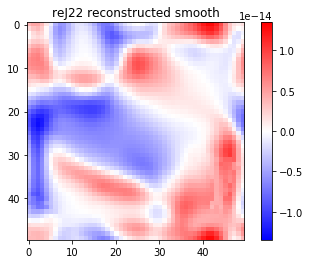

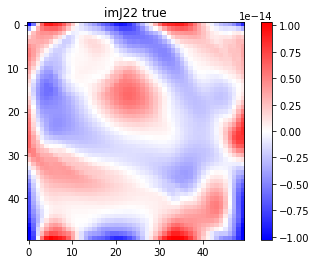

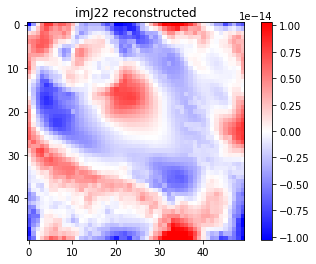

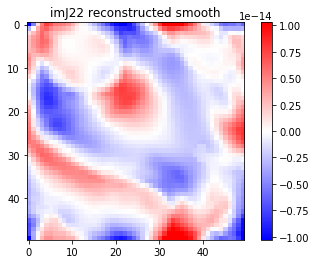

In [22]:
k = 23
print('slice at ' +str(round(sim_z[k],2)) + 'km')

plt.imshow(J00[k,:,:],cmap='inferno')
lo = np.min(J00[k,:,:])
hi = np.max(J00[k,:,:])
plt.title('J00 true')
plt.clim(lo,hi)
plt.colorbar()
plt.show()

plt.imshow(r_J00[k,:,:],cmap='inferno')
plt.title('J00 reconstructed')
plt.clim(lo,hi)
plt.colorbar()
plt.show()

plt.imshow(smooth_J00[k,:,:],cmap='inferno')
plt.title('J00 reconstructed smooth')
plt.clim(lo,hi)
plt.colorbar()
plt.show()


plt.imshow(J20[k,:,:],cmap='bwr')
plt.title('J20 true')
lo = np.min(J20[k,:,:])
hi = np.max(J20[k,:,:])
plt.clim(lo,hi)
plt.colorbar()
plt.show()

plt.imshow(r_J20[k,:,:],cmap='bwr')
plt.title('J20 reconstructed')
lo = np.min(J20[k,:,:])
hi = np.max(J20[k,:,:])
plt.clim(lo,hi)
plt.colorbar()
plt.show()


plt.imshow(smooth_J20[k,:,:],cmap='bwr')
plt.title('J20 reconstructed smooth')
lo = np.min(J20[k,:,:])
hi = np.max(J20[k,:,:])
plt.clim(lo,hi)
plt.colorbar()
plt.show()


plt.imshow(reJ21[k,:,:],cmap='bwr')
plt.title('reJ21 true')
lo = np.min(reJ21[k,:,:])
hi = np.max(reJ21[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()

plt.imshow(r_reJ21[k,:,:],cmap='bwr')
plt.title('reJ21 reconstructed')
lo = np.min(reJ21[k,:,:])
hi = np.max(reJ21[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()



plt.imshow(smooth_reJ21[k,:,:],cmap='bwr')
plt.title('reJ21 reconstructed smooth')
lo = np.min(reJ21[k,:,:])
hi = np.max(reJ21[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()

plt.imshow(imJ21[k,:,:],cmap='bwr')
plt.title('imJ21 true')
lo = np.min(imJ21[k,:,:])
hi = np.max(imJ21[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()

plt.imshow(r_imJ21[k,:,:],cmap='bwr')
plt.title('imJ21 reconstructed')
lo = np.min(imJ21[k,:,:])
hi = np.max(imJ21[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()



plt.imshow(smooth_imJ21[k,:,:],cmap='bwr')
plt.title('imJ21 reconstructed smooth')
lo = np.min(imJ21[k,:,:])
hi = np.max(imJ21[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()



plt.imshow(reJ22[k,:,:],cmap='bwr')
plt.title('reJ22 true')
lo = np.min(reJ22[k,:,:])
hi = np.max(reJ22[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()

plt.imshow(r_reJ22[k,:,:],cmap='bwr')
plt.title('reJ22 reconstructed')
lo = np.min(reJ22[k,:,:])
hi = np.max(reJ22[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()

plt.imshow(smooth_reJ22[k,:,:],cmap='bwr')
plt.title('reJ22 reconstructed smooth')
lo = np.min(reJ22[k,:,:])
hi = np.max(reJ22[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()


plt.imshow(imJ22[k,:,:],cmap='bwr')
plt.title('imJ22 true')
lo = np.min(imJ22[k,:,:])
hi = np.max(imJ22[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()

plt.imshow(r_imJ22[k,:,:],cmap='bwr')
plt.title('imJ22 reconstructed')
lo = np.min(imJ22[k,:,:])
hi = np.max(imJ22[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()


plt.imshow(smooth_imJ22[k,:,:],cmap='bwr')
plt.title('imJ22 reconstructed smooth')
lo = np.min(imJ22[k,:,:])
hi = np.max(imJ22[k,:,:])
up = np.max([lo,hi])
plt.clim(-up,up)
plt.colorbar()
plt.show()




In [23]:
compare = np.array([[J00,r_J00],[J20,r_J20],[reJ21,r_reJ21],[imJ21,r_imJ21],[reJ22,r_reJ22],[imJ22,r_imJ22]])
c_labels = np.array([['J00','r_J00'],['J20','r_J20'],['reJ21','r_reJ21'],['imJ21','r_imJ21']
                     ,['reJ22','r_reJ22'],['imJ22','r_imJ22']])

In [24]:
def compare_scatter(k,tensor_flag):
    true = compare[tensor_flag,0][k,:,:]
    recons = compare[tensor_flag,1][k,:,:]
    plt.scatter(true,recons,alpha=0.1)
    plt.plot(true,true,'r')

    plt.xlim(np.min(true),np.max(true))
    plt.ylim(np.min(recons),np.max(recons))
    plt.xlabel(c_labels[tensor_flag,0])
    plt.ylabel(c_labels[tensor_flag,1])
    plt.title(c_labels[tensor_flag,0] + ' true vs reconstructed')
    plt.show()

## Scatter plots without median filter

slice at 55.93km


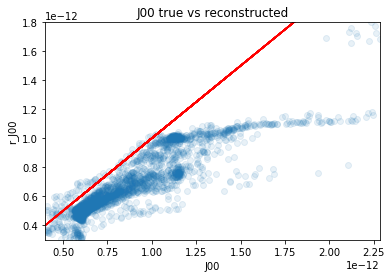

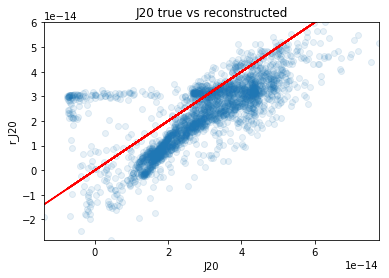

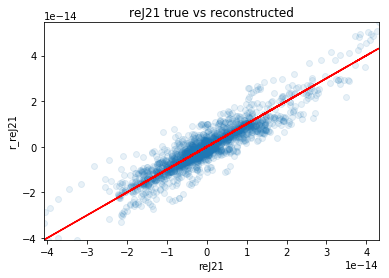

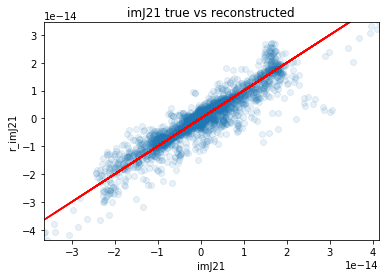

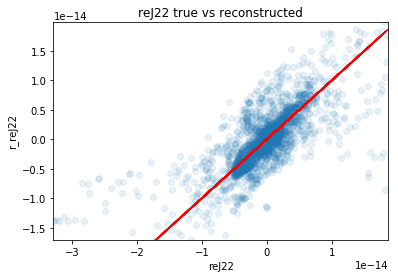

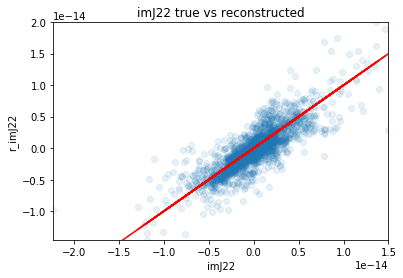

In [25]:
k = 25
print('slice at ' + str(round(sim_z[k],2)) + 'km')

for i in np.arange(6):
    compare_scatter(k,i)

In [26]:
def rpd(k,tensor_flag):
    true = compare[tensor_flag,0][k,:,:]
    recons = compare[tensor_flag,1][k,:,:]
    rel_pd = (recons - true)
    rel_pd /= 0.5*(np.abs(true) + np.abs(recons))
    return np.mean(rel_pd)

In [27]:
rpd_array = np.zeros((len(c_labels),len(sim_z)))

In [28]:
for tensor in np.arange(len(c_labels)):
    for k in np.arange(len(sim_z)):
        rpd_array[tensor,k] = rpd(k,tensor)
        

/Users/kulkarniad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


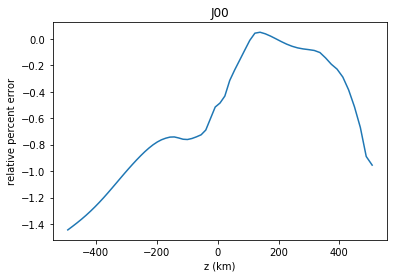

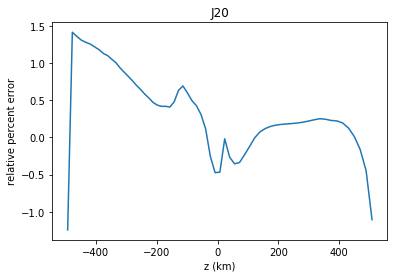

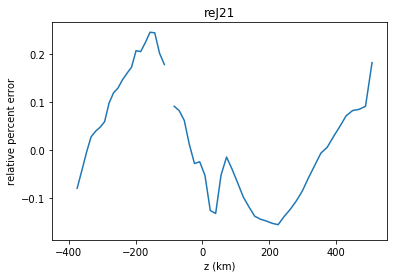

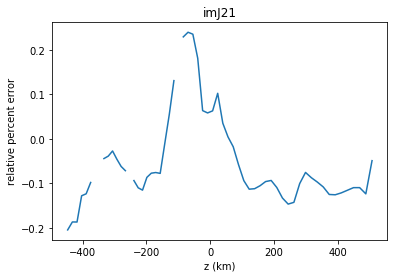

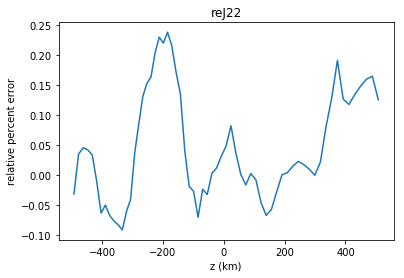

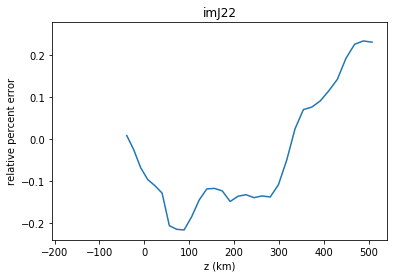

In [29]:
for i in np.arange(len(c_labels)):
    plt.plot(sim_z,rpd_array[i])
    plt.title(c_labels[i,0])
    plt.xlabel('z (km)')
    plt.ylabel('relative percent error')
    plt.show()

# make plots for smooth versions

In [30]:
compare = np.array([[J00,smooth_J00],[J20,smooth_J20],[reJ21,smooth_reJ21],[imJ21,smooth_imJ21],[reJ22,smooth_reJ22],[imJ22,smooth_imJ22]])
c_labels = np.array([['J00','smooth_J00'],['J20','smooth_J20'],['reJ21','smooth_reJ21'],['imJ21','smooth_imJ21']
                     ,['reJ22','smooth_reJ22'],['imJ22','smooth_imJ22']])

slice at 55.93km


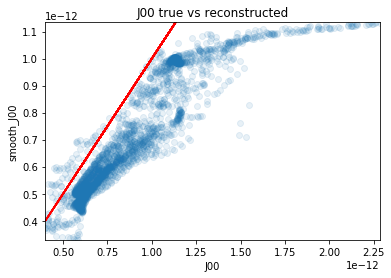

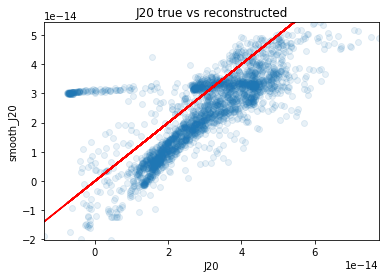

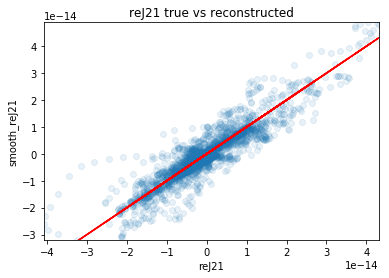

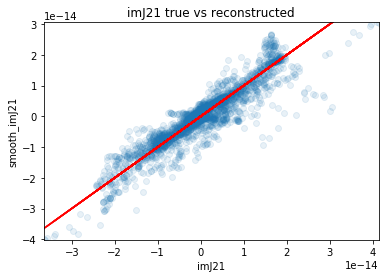

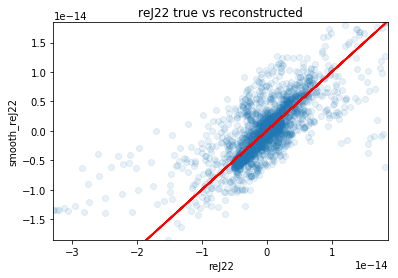

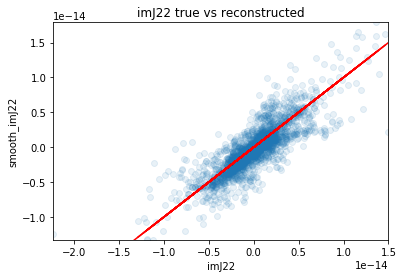

In [31]:
k = 25
print('slice at ' + str(round(sim_z[k],2)) + 'km')

for i in np.arange(6):
    compare_scatter(k,i)

In [32]:
rpd_array = np.zeros((len(c_labels),len(sim_z)))
for tensor in np.arange(len(c_labels)):

        rpd_array[tensor,k] = rpd(k,tensor)


/Users/kulkarniad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


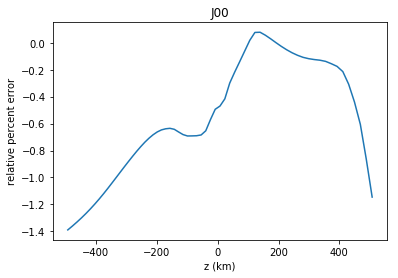

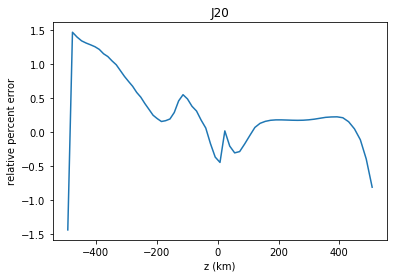

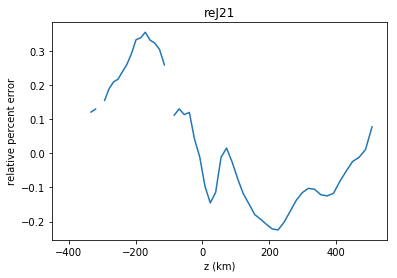

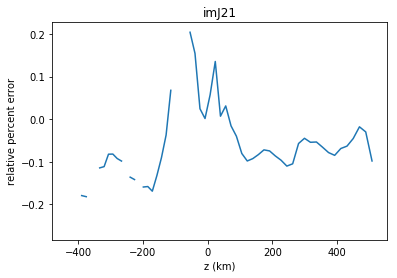

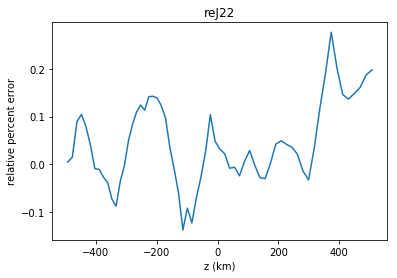

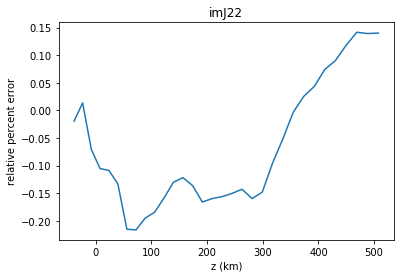

In [33]:
for i in np.arange(len(c_labels)):
    plt.plot(sim_z,rpd_array[i])
    plt.title(c_labels[i,0])
    plt.xlabel('z (km)')
    plt.ylabel('relative percent error')
    plt.show()

# Plots as a function of depth essentially look the same

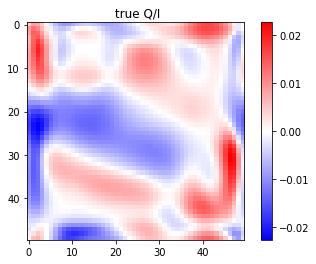

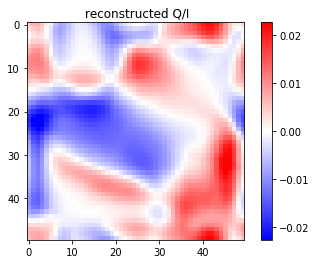

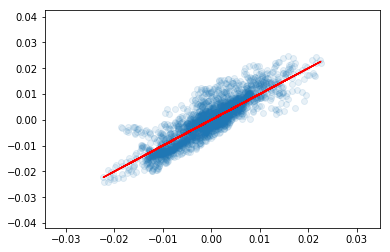

Standard deviation of residuals = 0.00407


In [34]:
k = 23
q_true = (reJ22/J00)[k,:,:]
q_rcns = (smooth_reJ22/smooth_J00)[k,:,:]
plt.imshow(q_true,cmap='bwr')
up = max(np.abs(np.max(q_true)),np.abs(np.max(q_true)))
plt.colorbar()
plt.clim(-up,up)
plt.title(" true Q/I")
plt.show()
plt.imshow(q_rcns,cmap='bwr')
plt.colorbar()
plt.clim(-up,up)
plt.title(" reconstructed Q/I")
plt.show()

plt.scatter(q_true,q_rcns,alpha=0.1)
plt.plot(q_true,q_true,'r')
plt.show()

print('Standard deviation of residuals = ' + str(round(np.std(q_rcns-q_true),5)))



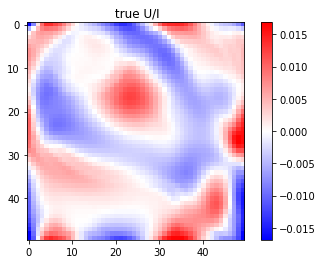

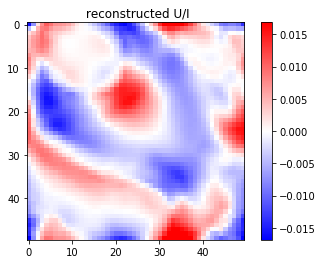

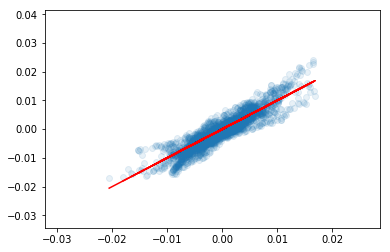

Standard deviation of residuals = 0.00241


In [35]:
k = 23
u_true = (imJ22/J00)[k,:,:]
u_rcns = (smooth_imJ22/smooth_J00)[k,:,:]
plt.imshow(u_true,cmap='bwr')
up = max(np.abs(np.max(u_true)),np.abs(np.max(u_true)))
plt.colorbar()
plt.clim(-up,up)
plt.title(" true U/I")
plt.show()
plt.imshow(u_rcns,cmap='bwr')
plt.colorbar()
plt.clim(-up,up)
plt.title(" reconstructed U/I")
plt.show()

plt.scatter(u_true,u_rcns,alpha=0.1)
plt.plot(u_true,u_true,'r')
plt.show()
print('Standard deviation of residuals = ' + str(round(np.std(u_rcns-u_true),5)))



In [36]:
from astropy.io import fits

In [37]:
i = fits.open('../smooth_reconstruct/i.fits')

In [38]:
i[0].data.shape

(472, 12, 50, 50)

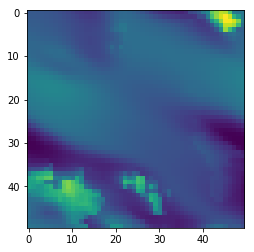

In [40]:
plt.imshow(i[0].data[20,6,:,:])